### Credit Card Fraud Detection

In [87]:
import pandas as pd
df=pd.read_csv('card_transdata.csv')
df.head(20)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [3]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
fraud_count = df['fraud'].value_counts()
fraud_count

0.0    912597
1.0     87403
Name: fraud, dtype: int64

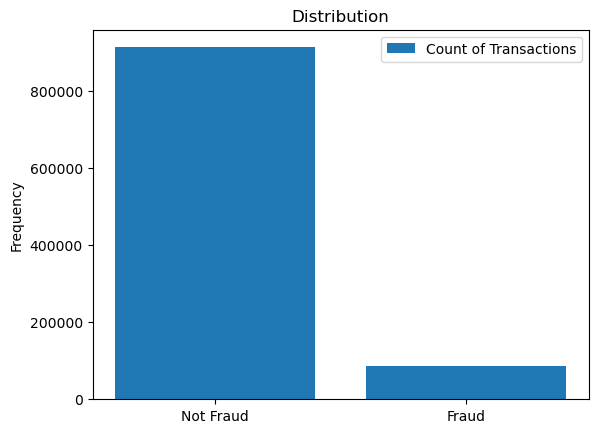

In [49]:
plt.bar(x=fraud_count.index,height=fraud_count.values,label='Count of Transactions')
plt.title('Distribution')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.legend()
plt.show()

We can see from this countplot that most of the transactions that not fraud. However, there is still a big number of transactions that are marked as fraud. We can calculate the percentages of transaction that are fraud from the total transaction so we have an idea on the proportion

In [54]:
Percentage_fraud=(fraud_count[1]/(fraud_count[0]+fraud_count[1]))*100
print('The percentage of total fraud transaction is',Percentage_fraud,'%')

The percentage of total fraud transaction is 8.7403 %


The graph indicates that the number of fraud transactions are much lower than genuine transactions, however, after calculating the percentage of fraud transaction, we calculated it to be nearly 9%. For any business, espeically small-mid sized business, this can be a lot of revenue lot due to fraud. Therefore, we need to find way to flag transactions that are likely fraud so we can alert the businesses and the customer whose card was stolen.

It's always a good idea to plot the variables against each other to see if there are any correlations. I will ignore the colums that are categorical for now and focus on continious columns such as:
* distance_from_home
* distance_from_last_transaction
* ratio_to_median_purchase_price

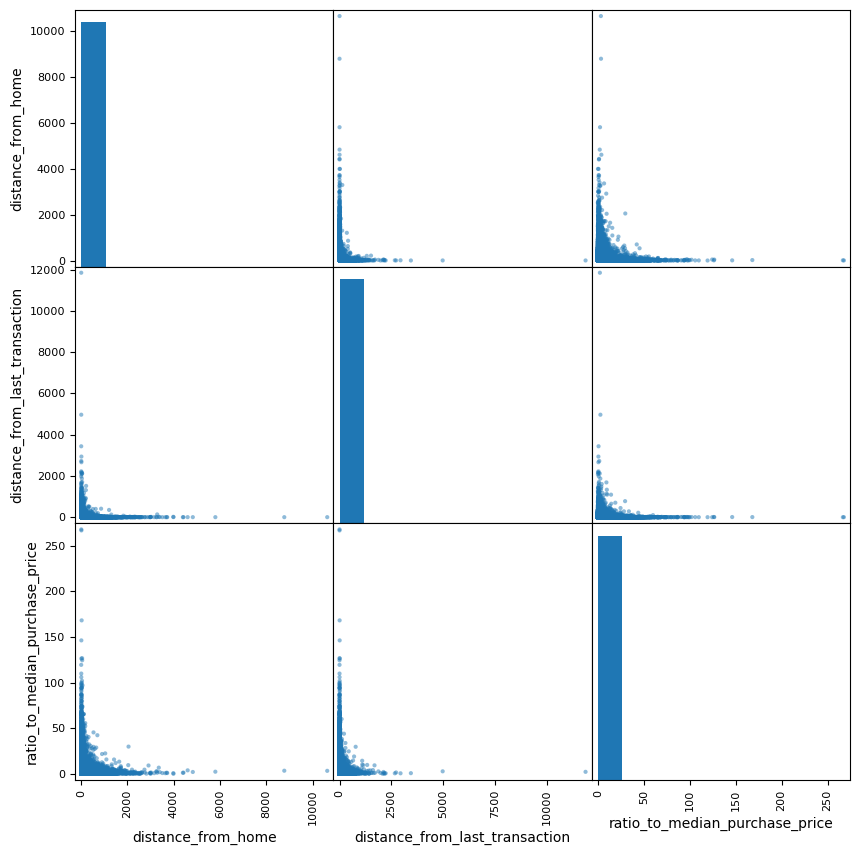

In [57]:
attributes=['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']
from pandas.plotting import scatter_matrix
scatter_matrix(df[attributes],figsize=(10,10))
plt.show()

The main diagnoal ( top left to bototm right) would be full of staight lines if Pandas plotted each variable against itself, which would not be very useful. So instead Pandas displays a historgram of each atrribute. We do see a negative expoential correlation between different categories.
We can see as the distance from last transaction increases the ratio to median purchase price decreases, and vice versa, as the distance from last transaction decreases, the ratio to median purchase price increases. 

We can also use a correlation matrix to get a better understand of the correlation

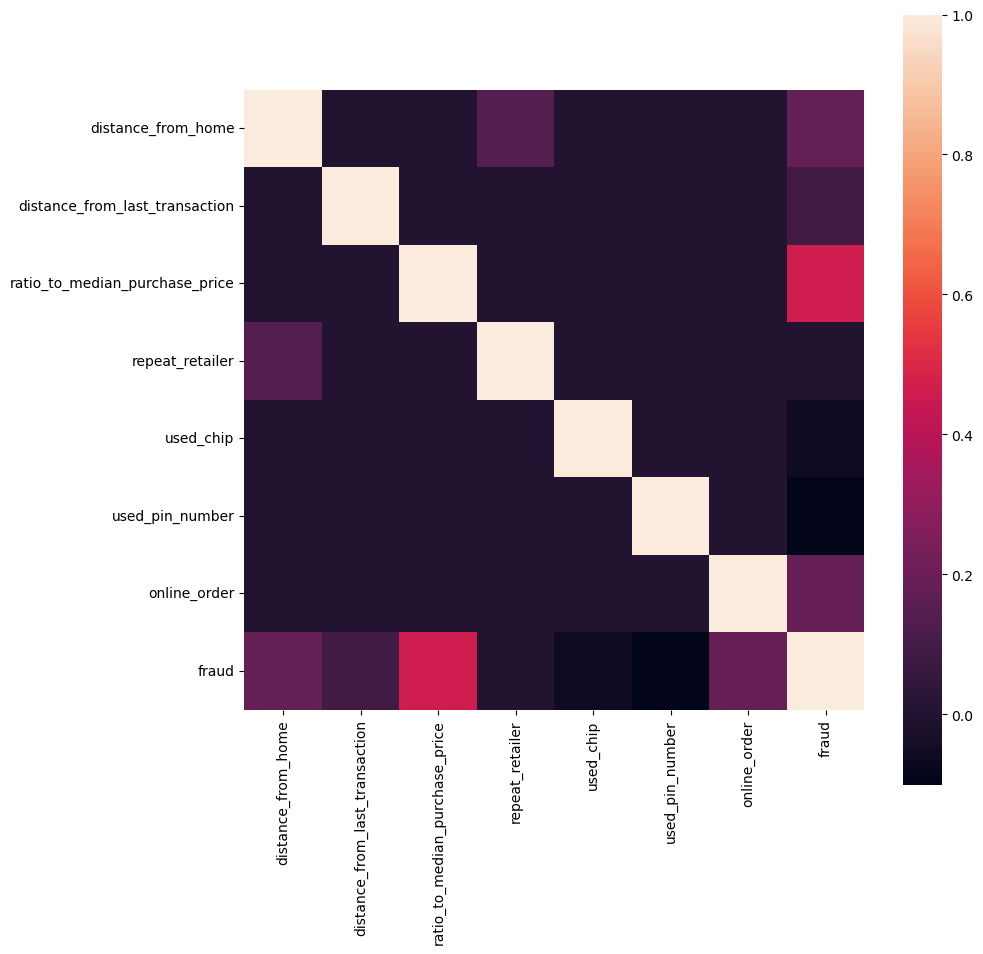

In [58]:
import seaborn as sns
corrmat=df.corr()
fig=plt.figure(figsize=(10,10))
sns.heatmap(corrmat,square=True)
plt.show()

Based on the heatmap, we can see that a lot of values are close to 0 except between fraud transaction and the ratio to median purchase price. This means that most of the fraud transactions are correlated with the ratio of the transaction with the median transaction price. This makes sense right?
If a genuine transaction for a specific customers is always between $30-$100 for example, and the same customer makes a transaction $500 then there's a very high chance that its likely a fraud.

#### Now lets apply some machine learning techniques to predict if a transaction is fraudulent or not


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [60]:
 X_train, X_test, y_train, y_test = train_test_split(df.drop('fraud',axis=1),df['fraud'], test_size=0.33, random_state=42)

In [61]:
model=LogisticRegression()
model.fit(X_train,y_train)

/Users/zishanvisram/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
y_pred=model.predict(X_test)

In [64]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)

Accuracy: 0.9582363636363637


Based on our model, our accuracy for prediciting a fraud transaction is almost 96% which is great! This means that our model can predict if a transaction is fraud or not accurately 96% of the time!

Let's run a test transaction with the following attributes. We will insert the data for a new transaction and use our model to compute the probability that the transaction is fraudulent, which we will use to a set a threshold for fraud detection. In my result below, if the model outputs a probability of 0.80 or higher, it will classift the transaction as fraud. The threshold for fraud detection can vary depending on the industry but we do not want to set it very high because this may result in the following:
* Missed Fraud casses which could lead to financial losses
* Increased workload for the detectig team to review more transactions
* There may be fever instances of fradulent transactions with a probability of 90% or higher, which would reduce the effectiveness of the threshold

The advantages of setting a high threshold however are:
* Increased fraud detection - This helps you catch more fraud casses that would have otherwise gone undetected
* Setting a high threshold would ensure that only transactions with high probability of fraud will be flagged

Ultimately, the threshold for fraud detection should be determined based on the specific needs and goals of the business, as well as the nature and frequency of fraudulent activities. It's important to strike a balance between catching as many fraud cases as possible while minimizing false positives and workload.

In [86]:
new_transaction = {
    'distance_from_home': 10.131956,
    'distance_from_last_transaction': 56.372401,
    'ratio_to_median_purchase_price': 6.358667,
    'repeat_retailer': 1.0,
    'used_chip': 0.0,
    'used_pin_number': 0.0,
    'online_order': 1.0
}

new_transaction_df=pd.DataFrame(new_transaction,index=[0])
fraud_probability=model.predict_proba(new_transaction_df)[:,1]
if fraud_probability >=0.80:
    print('Fradulent transaction detected!')
else:
    print('Transaction is not fraudulent')

Fradulent transaction detected!
